In [221]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [222]:
def plot_measure(df):
  e=np.unique(df['Anomaly_At_Time_ms'])[0]
  df=df[df.TimeMS > 400]
  #plt.plot('TimeMS','StrainGage',data=df)
  #plt.plot('TimeMS','Avg_Velocity',data=df)
  plt.figure(figsize=(16,12))
  for i in range(1,5):
    measure=measures[i-1]
    plt.subplot(2,2,i)
    plt.title(measure.title() + ' from a surgical instrument')
    # naming the x axis
    plt.xlabel('Time in Milliseconds')
    # naming the y axis
    plt.ylabel(measure.title())
    plt.plot('TimeMS',measure,data=df)
    #plt.plot('TimeMS','avg_current',data=df)
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')
  plt.show()

In [223]:
np.unique(data['id'])

array([  2,   3,   4,   5,   6,   8,  13,  14,  15,  16,  17,  19,  20,
        21,  23,  24,  25,  26,  29,  30,  32,  33,  34,  36,  37,  38,
        39,  40,  41,  42,  43,  45,  47,  49,  51,  52,  53,  54,  56,
        57,  59,  61,  62,  63,  64,  66,  67,  68,  70,  73,  74,  75,
        76,  78,  79,  80,  81,  84,  85,  86,  87,  88,  92,  96,  97,
       100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114,
       117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 130, 133, 134,
       135, 136, 137, 139, 140, 141, 146, 147, 149, 151, 153, 154, 155,
       156, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 172,
       173, 174, 175, 178, 179, 181, 182, 184, 186, 188, 189, 190, 191,
       193, 195, 196, 197, 199, 200, 202, 203, 207, 208, 210, 211, 212,
       213, 214, 215, 216, 220, 221, 222, 223, 224, 225, 226, 227, 231,
       232, 233, 234, 235, 236, 237, 239, 241, 243, 244, 246, 247, 249,
       250, 251, 254, 255, 256, 257, 261, 262, 263, 264, 265, 26

In [240]:
data = pd.read_csv('C:\\Users\\SAIL\\stapler-ds (1).csv')



In [241]:
for i in np.unique(data['id']):
    data['Label'] = np.where(data['TimeMS'] >= data['True_Endstop_Time_ms'], 1, 0)
data

,Unnamed: 0,id,TimeMS,Avg_Velocity,PWM_Output,SG_NoFilter,Setpoint,StrainGage,avg_current,current_filter,ticks,True_Endstop_Time_ms,Articulation,Tissue,Tissue_Thickness_inch,Firing_Type,Label
0,0,100,0,0.00,153,11,33750,1,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted,0
1,1,100,1,0.00,165,11,33750,2,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted,0
2,2,100,2,0.00,176,11,33750,4,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted,0
3,3,100,3,0.00,188,11,33750,5,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted,0
4,4,100,4,0.00,199,11,33750,6,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183005,3183005,97,4642,93.75,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted,1
3183006,3183006,97,4643,62.50,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted,1
3183007,3183007,97,4643,62.50,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted,1
3183008,3183008,97,4644,31.25,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted,1


In [242]:
 data[data['id'] == 2][['Label']]


,Label
658343,0
658344,0
658345,0
658346,0
658347,0
...,...
662102,1
662103,1
662104,1
662105,1


In [243]:
cols=['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type','Label']
data=data[cols].rename({'True_Endstop_Time_ms':'Anomaly_At_Time_ms'},axis=1)
measures=['Avg_Velocity','StrainGage','avg_current','PWM_Output','Label','Anomaly_At_Time_ms','id','TimeMS']
for i in range(1,6):
  measure=measures[i-1]
  print(measure.title())
data=data[measures]

Avg_Velocity
Straingage
Avg_Current
Pwm_Output
Label


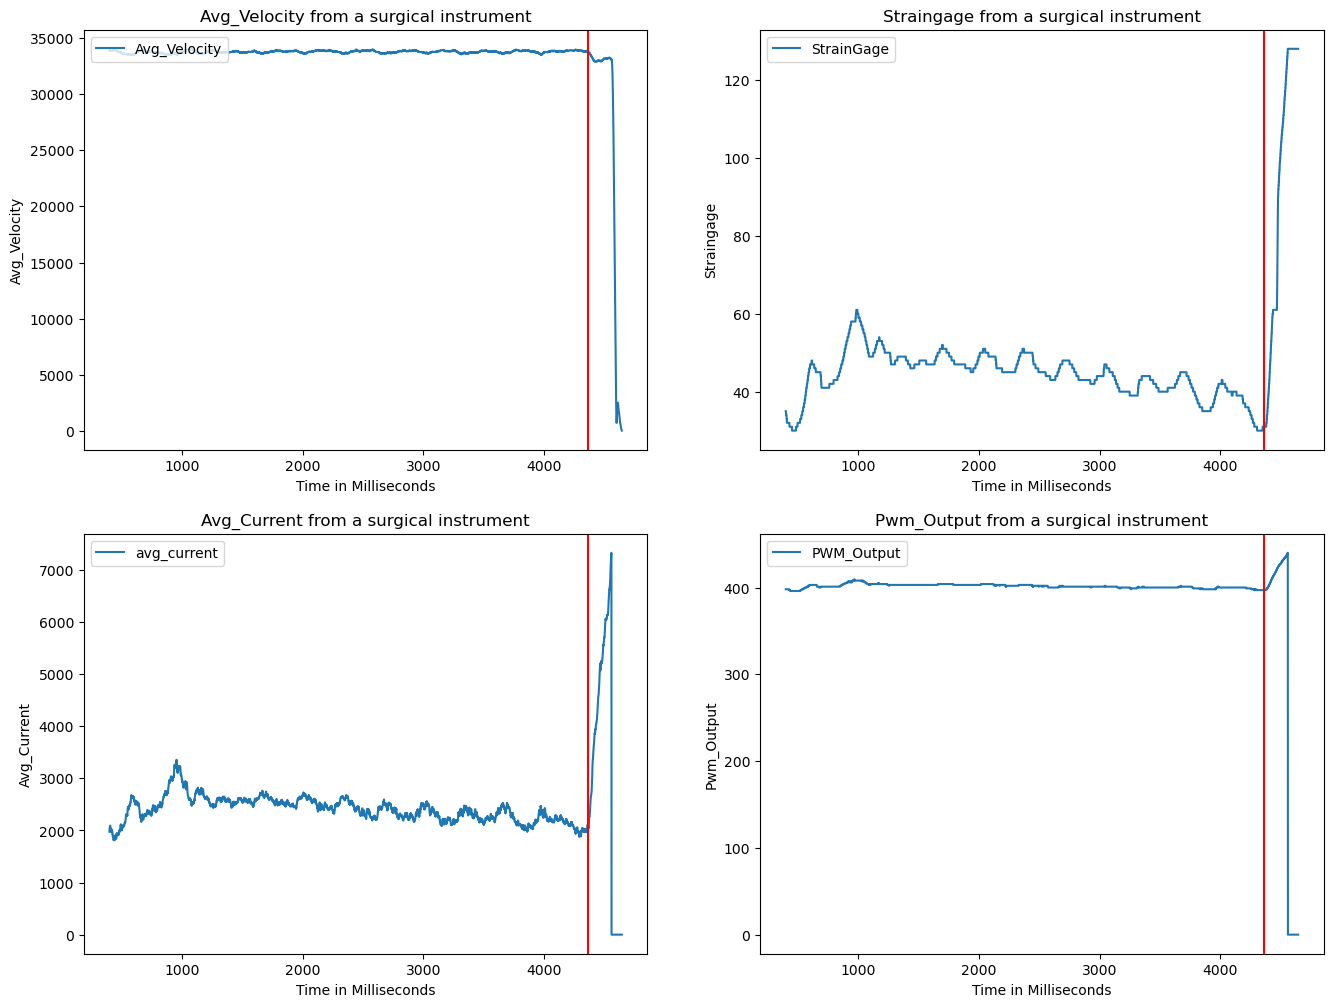

In [244]:
df_97=data["id"]==97
plot_measure(data[df_97])

In [245]:
train_set=data[data['Label']==0]
train_set

,Avg_Velocity,StrainGage,avg_current,PWM_Output,Label,Anomaly_At_Time_ms,id,TimeMS
0,0.0,1,0,153,0,3360,100,0
1,0.0,2,0,165,0,3360,100,1
2,0.0,4,0,176,0,3360,100,2
3,0.0,5,0,188,0,3360,100,3
4,0.0,6,0,199,0,3360,100,4
...,...,...,...,...,...,...,...,...
3182441,33750.0,31,2101,397,0,4363,97,4360
3182442,33750.0,31,2105,397,0,4363,97,4361
3182443,33750.0,31,2105,397,0,4363,97,4361
3182444,33750.0,31,2105,397,0,4363,97,4362


In [246]:
test_set=data[data['Label']==1]

In [ ]:
# group data from all ids in to anomaly and non-anomaly
# create window of 100 consecutive timems for both anomaly and non-anomaly - identify the consecutive timems using id+timems 
# train the algo on (80%)normal, RNN time step 100
# find the threshold
# validate 


In [247]:
data[['TimeMS','id']].groupby('id').count()

,TimeMS
id,
2,3764
3,3681
4,7436
5,7468
6,7376
...,...
366,12422
368,22102
370,12286


In [175]:
as_np_train_X = train_set.drop(train_set[['Label', 'id', 'Anomaly_At_Time_ms']], axis=1).to_numpy()
print(as_np_train_X)
as_np_train_Y = train_set[['Label']].to_numpy()
index = int(len(as_np_train_X) * 0.80)
train_stapler, y_train = as_np_train_X[:index, :-1], as_np_train_Y[:index, -1]
test_stapler, y_test = as_np_train_X[index:, :-1], as_np_train_Y[index:, -1]


[[0.000e+00 1.000e+00 0.000e+00 1.530e+02 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 1.650e+02 1.000e+00]
 [0.000e+00 4.000e+00 0.000e+00 1.760e+02 2.000e+00]
 ...
 [3.375e+04 3.100e+01 2.105e+03 3.970e+02 4.361e+03]
 [3.375e+04 3.100e+01 2.105e+03 3.970e+02 4.362e+03]
 [3.375e+04 3.100e+01 2.105e+03 3.970e+02 4.362e+03]]


In [248]:
X_train=train_set.drop(train_set[['Label', 'id', 'Anomaly_At_Time_ms']], axis=1)
Y_train= train_set[['Label']]

In [249]:
X_test=test_set.drop(test_set[['Label', 'id', 'Anomaly_At_Time_ms']], axis=1)
Y_test= test_set[['Label']]

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [251]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Choose the number of hidden states
num_states =2

# Create an HMM model
model = hmm.GaussianHMM(n_components=num_states, covariance_type="tied", random_state=42,n_iter=500)

# Train the HMM model
model.fit(X_train)

# Generate a sequence of hidden states using the trained model
hidden_states = model.predict(X_train)


C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [253]:
hidden_states.shape

(3041184,)

In [265]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2))
    return np.mean(abs(v1 - v2))

Y_true_train= np.zeros(hidden_states.shape)

mae = np.mean(abs(Y_true_train - hidden_states))
epsilon = 1e-15  # small value to avoid division by zero
loss = -(hidden_states * np.log(Y_true_train + epsilon) + (1 - hidden_states) * np.log(1 - Y_true_train + epsilon))
print(f'Avg error {np.mean(loss)}\nmedian error {np.median(loss)}\n99Q: {np.quantile(loss, 0.99)}')
print(f'setting threshold on { np.quantile(loss, 0.99)} ')

error_thresh = np.quantile(mae, 0.99)

Avg error 7.081883324980686
median error -1.110223024625156e-15
99Q: 34.538776394910684
setting threshold on 34.538776394910684 


In [266]:

# Generate a sequence of hidden states using the trained model
y_pred = model.predict(X_test)
#MSE calculation and also binary cross entropy calculation 
import numpy as np
y_true=np.ones(y_pred.shape)
mae = np.mean(abs(Y_true_train - hidden_states))
epsilon = 1e-15  # small value to avoid division by zero
loss_test = -(y_pred * np.log(y_true + epsilon) + (1 - y_pred) * np.log(1 - y_true + epsilon))
anomalies = (loss_test > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

from sklearn.metrics import classification_report
print(classification_report(y_true, anomalies))





              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.82      0.90    141826

    accuracy                           0.82    141826
   macro avg       0.50      0.41      0.45    141826
weighted avg       1.00      0.82      0.90    141826



C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:



chunk_size = 10000
num_samples = len(y_pred)

mse = 0.0

for i in range(0, num_samples, chunk_size):
    chunk_pred = y_pred[i:i+chunk_size]
    chunk_true = y_true[i:i+chunk_size]
    mse += np.mean((chunk_pred - chunk_true) ** 2)
    epsilon = 1e-15  # small value to avoid division by zero
    loss = -(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))#Binary Cross-Entropy Loss
    mean_loss = np.mean(loss)


mse /= (num_samples // chunk_size) + 1

print("Mean Squared Error:", mse)
print("Binary Cross-Entropy Loss:", mean_loss)

print("Mean Squared Error:", mse)

print("Binary Cross-Entropy Loss:", mean_loss)
anomalies = (loss > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

from sklearn.metrics import classification_report
print(classification_report(y_true, anomalies))